In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("/Users/saeed/Library/CloudStorage/OneDrive-DalhousieUniversity/0- Dalhousie University - Saeed/plotting/data")

In [3]:
df = pd.read_csv("1410028701_databaseLoadingData.csv")
df.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Gender,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-01,Canada,2021A000011124,Population,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Persons in thousands,428,thousands,3,v2062809,1.1.1.1.1.1,30907.3,NaN,NaN,NaN,1
1,2020-02,Canada,2021A000011124,Population,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Persons in thousands,428,thousands,3,v2062809,1.1.1.1.1.1,30945.1,NaN,NaN,NaN,1
2,2020-03,Canada,2021A000011124,Population,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Persons in thousands,428,thousands,3,v2062809,1.1.1.1.1.1,30988.3,NaN,NaN,NaN,1
3,2020-04,Canada,2021A000011124,Population,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Persons in thousands,428,thousands,3,v2062809,1.1.1.1.1.1,31014.2,NaN,NaN,NaN,1
4,2020-05,Canada,2021A000011124,Population,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Persons in thousands,428,thousands,3,v2062809,1.1.1.1.1.1,31037.6,NaN,NaN,NaN,1


In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

REF_DATE
['2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01' '2021-02'
 '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09'
 '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05' '2023-06'
 '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12' '2024-01'
 '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07' '2024-08'
 '2024-09' '2024-10' '2024-11' '2024-12' '2025-01' '2025-02' '2025-03'
 '2025-04']

GEO
['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']

DGUID
['2021A000011124' '2021A000210' '2021A000211' '2021A000212' '2021A000213'
 '2021A000224' '2021A000235' '2021A000246' '2021A000247' '2021A000248'
 '2021A000259']

In [4]:
atlantic_provinces = [
    "Newfoundland and Labrador",
    "Prince Edward Island",
    "Nova Scotia",
    "New Brunswick"
]

In [80]:
df["Gender"].unique()

array(['Total - Gender', 'Men+', 'Women+'], dtype=object)

In [82]:
df_filtered = df[
    (df["GEO"].isin(atlantic_provinces)) &
    (df["Labour force characteristics"] == "Unemployment rate") #&
    #(df["Gender"] == "Total - Gender")
]

In [111]:
df_filtered.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Gender,Age group,Statistics,Data type,UOM,UOM_ID,...,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Year,Month
8064,2020-01-01,New Brunswick,2021A000213,Unemployment rate,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Percent,239,...,0,v2063571,5.7.1.1.1.1,7.8,NaN,NaN,NaN,1,2020,1
8128,2020-01-01,New Brunswick,2021A000213,Unemployment rate,Men+,15 years and over,Estimate,Seasonally adjusted,Percent,239,...,0,v2063580,5.7.2.1.1.1,9.7,NaN,NaN,NaN,1,2020,1
8192,2020-01-01,New Brunswick,2021A000213,Unemployment rate,Women+,15 years and over,Estimate,Seasonally adjusted,Percent,239,...,0,v2063589,5.7.3.1.1.1,5.7,NaN,NaN,NaN,1,2020,1
8065,2020-02-01,New Brunswick,2021A000213,Unemployment rate,Total - Gender,15 years and over,Estimate,Seasonally adjusted,Percent,239,...,0,v2063571,5.7.1.1.1.1,7.4,NaN,NaN,NaN,1,2020,2
8129,2020-02-01,New Brunswick,2021A000213,Unemployment rate,Men+,15 years and over,Estimate,Seasonally adjusted,Percent,239,...,0,v2063580,5.7.2.1.1.1,8.6,NaN,NaN,NaN,1,2020,2


In [86]:
df_filtered['REF_DATE'] = pd.to_datetime(df_filtered['REF_DATE'])
df_filtered = df_filtered.sort_values(['GEO', 'REF_DATE'])
df_filtered['Year'] = df_filtered['REF_DATE'].dt.year
df_filtered['Month'] = df_filtered['REF_DATE'].dt.month

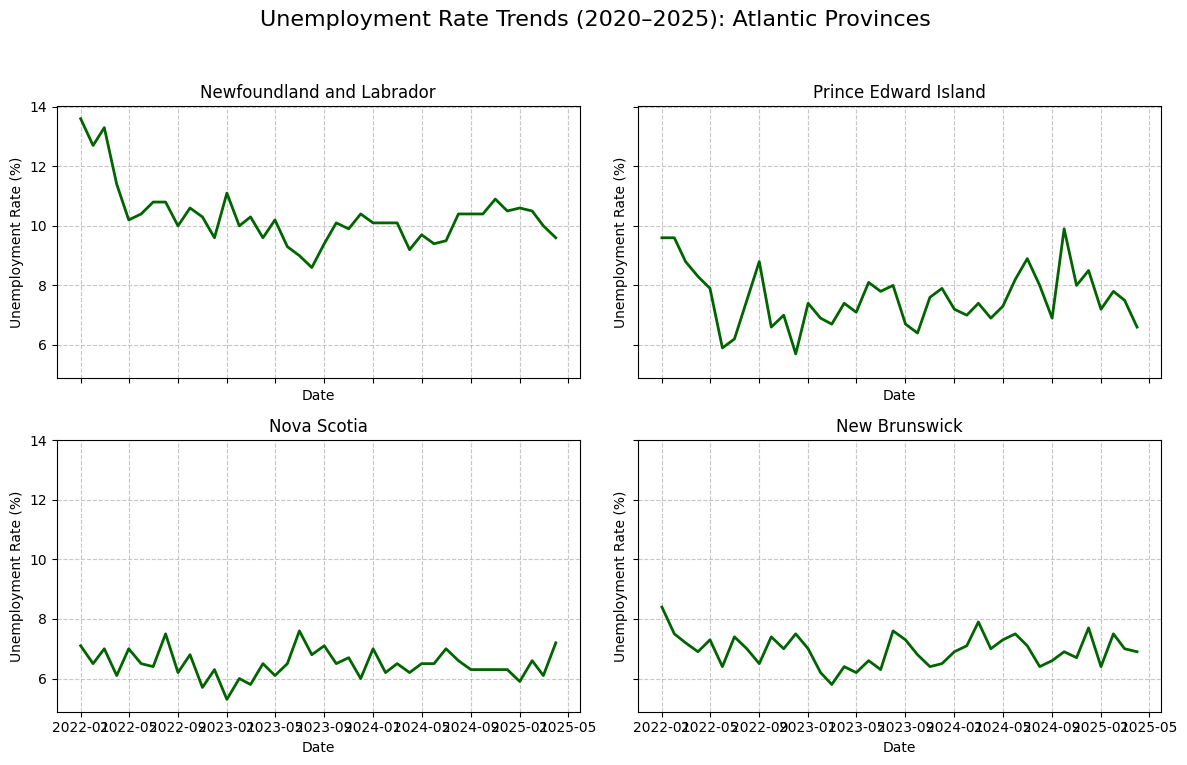

In [116]:
df_filtered_f = df_filtered[(df_filtered['Year'] >= 2022)&(df_filtered["Gender"] == "Total - Gender") ]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
province_titles = atlantic_provinces

for i, province in enumerate(province_titles):
    ax = axs[i // 2, i % 2]
    data = df_filtered_f[df_filtered_f['GEO'] == province]
    ax.plot(data['REF_DATE'], data['VALUE'], lw = 2, c='darkgreen')
    ax.set_title(province)
    ax.set_ylabel("Unemployment Rate (%)")
    ax.set_xlabel("Date")
    ax.grid(True, linestyle='--', alpha=0.7)
    
fig.suptitle('Unemployment Rate Trends (2020–2025): Atlantic Provinces', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

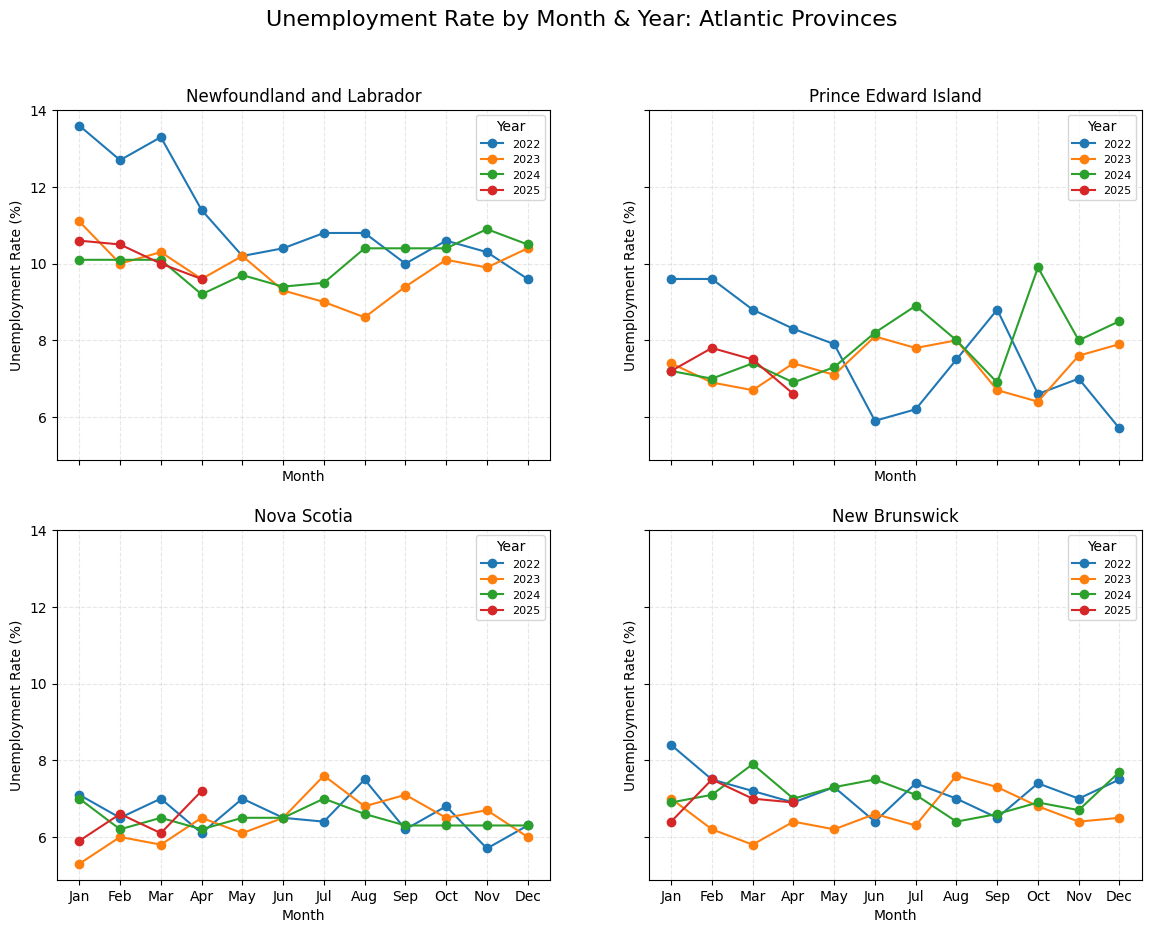

In [88]:
df_filtered_f = df_filtered[(df_filtered['Year'] >= 2022)&(df_filtered["Gender"] == "Total - Gender")]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
province_titles = atlantic_provinces

for i, province in enumerate(province_titles):
    ax = axs[i // 2, i % 2]
    data = df_filtered_f[df_filtered_f['GEO'] == province]
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]
        ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year))
    ax.set_title(province)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylabel("Unemployment Rate (%)")
    ax.set_xlabel("Month")
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(title='Year', fontsize=8, loc='upper right')

fig.suptitle('Unemployment Rate by Month & Year: Atlantic Provinces', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

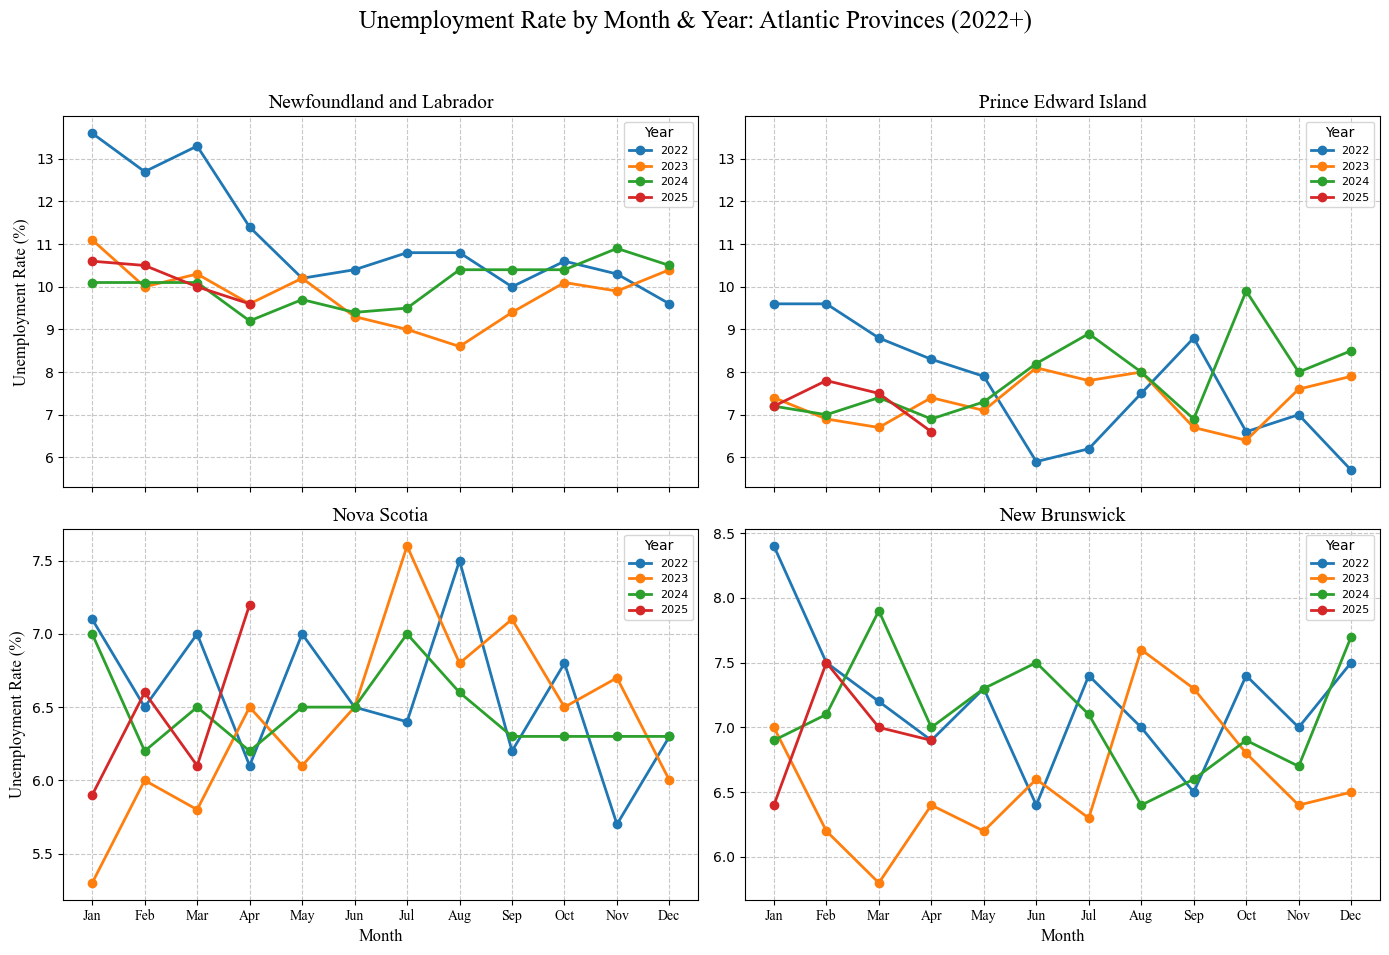

In [102]:
df_filtered_f = df_filtered[(df_filtered['Year'] >= 2022)&(df_filtered["Gender"] == "Total - Gender")]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

axs[0, 1].sharey(axs[0, 0])

province_titles = [
    "Newfoundland and Labrador",    
    "Prince Edward Island",         
    "Nova Scotia",                  
    "New Brunswick"                 
]

for idx, province in enumerate(province_titles):
    row, col = divmod(idx, 2)
    ax = axs[row, col]
    data = df_filtered_f[df_filtered_f['GEO'] == province]
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]
        ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2)
    ax.set_title(province, fontname='Times New Roman', fontsize=14)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontname='Times New Roman')
    #ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=10)
    #ax.set_xlabel("Month", fontname='Times New Roman', fontsize=10)
    
    # Show x-label only on bottom row
    if row == 1:
        ax.set_xlabel("Month", fontname='Times New Roman', fontsize=12)
    else:
        ax.set_xlabel("")

    # Show y-label only on left column
    if col == 0:
        ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=12)
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Year', fontsize=8, loc='upper right')

fig.suptitle('Unemployment Rate by Month & Year: Atlantic Provinces (2022+)', fontsize=18, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.figtext(
#    0.5, -0.02,
#    'Source: Statistics Canada. Table 14-10-0287-01  Labour force characteristics, monthly, seasonally adjusted and trend-cycle',
#    wrap=True,
#    horizontalalignment='center',
#    fontsize=10,
#    fontname='Times New Roman',
#    weight='medium'
#)

plt.show()

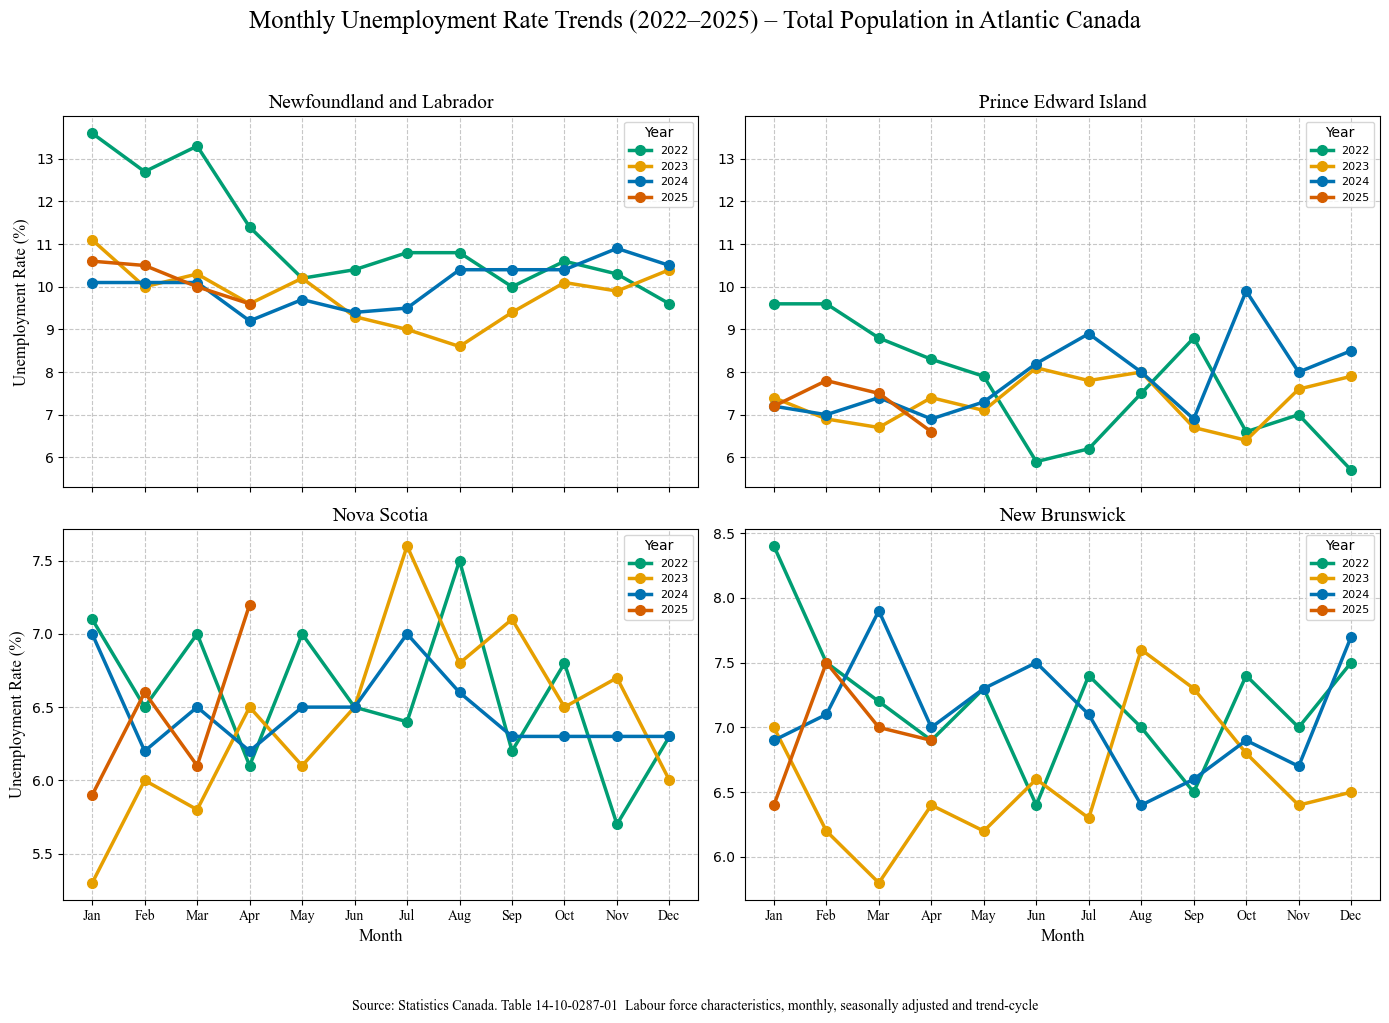

In [106]:
df_filtered_f = df_filtered[(df_filtered['Year'] >= 2022)&(df_filtered["Gender"] == "Total - Gender")]


#cmap = plt.get_cmap('tab10')
#colors = [cmap(i) for i in range(4)]  
#colors = ["#3C3C3C", "#E3120B", "#008F95", "#FFC20E"]
#colors = ["#1696d2", "#fdbf11", "#ec008b", "#f87038"]
colors = ["#0072B2", "#D55E00", "#009E73", "#E69F00"]

years = sorted(df_filtered['Year'].unique())
year_color = {year: colors[i % len(colors)] for i, year in enumerate(years)}

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

axs[0, 1].sharey(axs[0, 0])

province_titles = [
    "Newfoundland and Labrador",    
    "Prince Edward Island",         
    "Nova Scotia",                  
    "New Brunswick"                 
]

for idx, province in enumerate(province_titles):
    row, col = divmod(idx, 2)
    ax = axs[row, col]
    data = df_filtered_f[df_filtered_f['GEO'] == province]
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]
        #ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2)
        ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2.5, 
                color=year_color[year], markersize = 7)
    ax.set_title(province, fontname='Times New Roman', fontsize=14)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontname='Times New Roman')
    #ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=10)
    #ax.set_xlabel("Month", fontname='Times New Roman', fontsize=10)
    
    if row == 1:
        ax.set_xlabel("Month", fontname='Times New Roman', fontsize=12)
    else:
        ax.set_xlabel("")

    if col == 0:
        ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=12)
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Year', fontsize=8, loc='upper right')

fig.suptitle('Monthly Unemployment Rate Trends (2022–2025) – Total Population in Atlantic Canada', fontsize=18, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(
    0.5, -0.02,
    'Source: Statistics Canada. Table 14-10-0287-01  Labour force characteristics, monthly, seasonally adjusted and trend-cycle',
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    fontname='Times New Roman',
    weight='medium'
)

#plt.savefig('unemp_total_atlantic_2022_25.png', dpi=500, bbox_inches='tight')

plt.show()

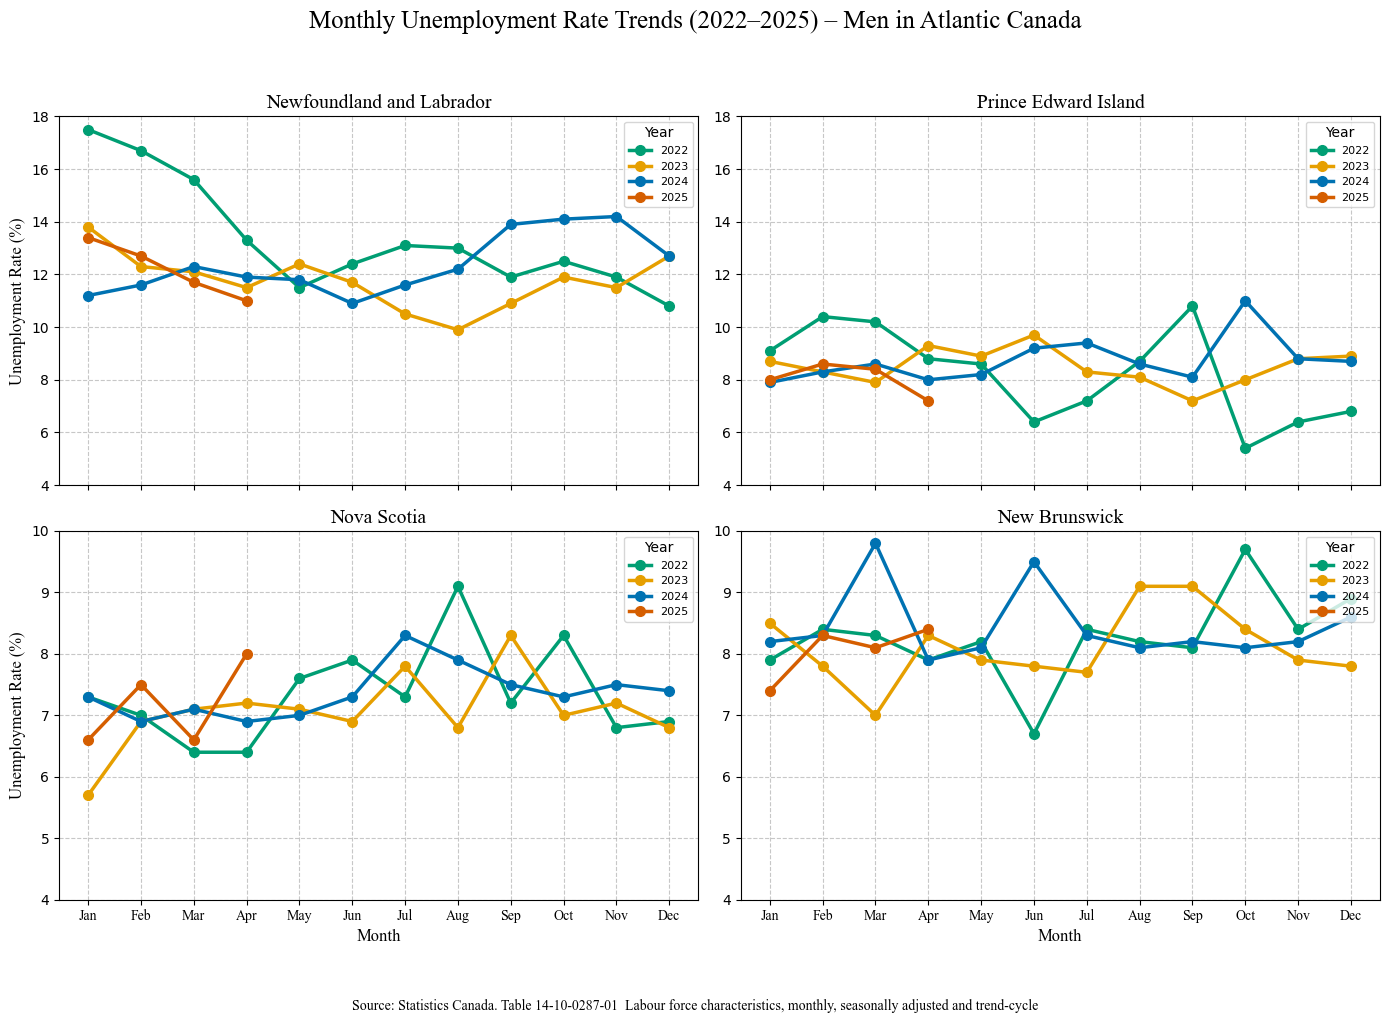

In [109]:
df_filtered_f = df_filtered[(df_filtered['Year'] >= 2022)&(df_filtered["Gender"] == "Men+")]

#cmap = plt.get_cmap('tab10')
#colors = [cmap(i) for i in range(4)]  
#colors = ["#3C3C3C", "#E3120B", "#008F95", "#FFC20E"] 
#colors = ["#1696d2", "#fdbf11", "#ec008b", "#f87038"] 
colors = ["#0072B2", "#D55E00", "#009E73", "#E69F00"]  

years = sorted(df_filtered['Year'].unique())
year_color = {year: colors[i % len(colors)] for i, year in enumerate(years)}


fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)


axs[0, 1].sharey(axs[0, 0])

province_titles = [
    "Newfoundland and Labrador",    
    "Prince Edward Island",         
    "Nova Scotia",                  
    "New Brunswick"                 
]

for idx, province in enumerate(province_titles):
    row, col = divmod(idx, 2)
    ax = axs[row, col]
    data = df_filtered_f[df_filtered_f['GEO'] == province]
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]
        #ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2)
        ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2.5, 
                color=year_color[year], markersize = 7)
    ax.set_title(province, fontname='Times New Roman', fontsize=14)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontname='Times New Roman')
    #ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=10)
    #ax.set_xlabel("Month", fontname='Times New Roman', fontsize=10)
    

    if row == 1:
        ax.set_xlabel("Month", fontname='Times New Roman', fontsize=12)
        ax.set_ylim((4,10))
    else:
        ax.set_xlabel("")
        ax.set_ylim((4,18))


    if col == 0:
        ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=12)
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Year', fontsize=8, loc='upper right')

fig.suptitle('Monthly Unemployment Rate Trends (2022–2025) – Men in Atlantic Canada', fontsize=18, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(
    0.5, -0.02,
    'Source: Statistics Canada. Table 14-10-0287-01  Labour force characteristics, monthly, seasonally adjusted and trend-cycle',
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    fontname='Times New Roman',
    weight='medium'
)

#plt.savefig('unemp_men_atlantic_2022_25.png', dpi=500, bbox_inches='tight')

plt.show()

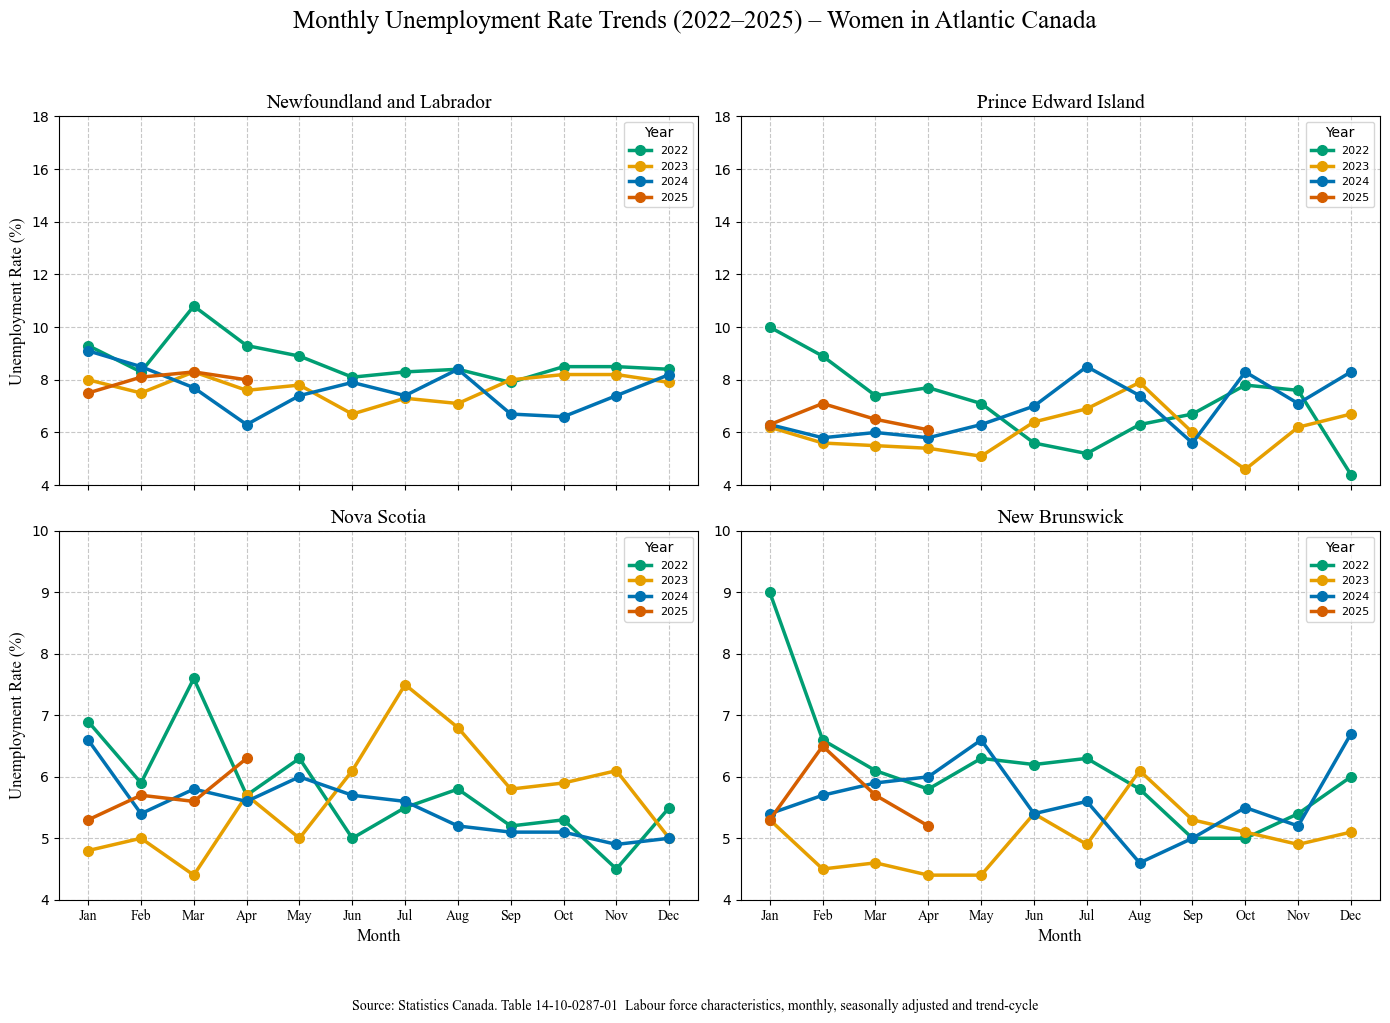

In [110]:
df_filtered_f = df_filtered[(df_filtered['Year'] >= 2022)&(df_filtered["Gender"] == "Women+")]

#cmap = plt.get_cmap('tab10')
#colors = [cmap(i) for i in range(4)]  
#colors = ["#3C3C3C", "#E3120B", "#008F95", "#FFC20E"] 
#colors = ["#1696d2", "#fdbf11", "#ec008b", "#f87038"] 
colors = ["#0072B2", "#D55E00", "#009E73", "#E69F00"]  

years = sorted(df_filtered['Year'].unique())
year_color = {year: colors[i % len(colors)] for i, year in enumerate(years)}


fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)


axs[0, 1].sharey(axs[0, 0])

province_titles = [
    "Newfoundland and Labrador",   
    "Prince Edward Island",        
    "Nova Scotia",                 
    "New Brunswick"                
]

for idx, province in enumerate(province_titles):
    row, col = divmod(idx, 2)
    ax = axs[row, col]
    data = df_filtered_f[df_filtered_f['GEO'] == province]
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]
        #ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2)
        ax.plot(year_data['Month'], year_data['VALUE'], marker='o', label=str(year), lw = 2.5, 
                color=year_color[year], markersize = 7)
    ax.set_title(province, fontname='Times New Roman', fontsize=14)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontname='Times New Roman')
    #ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=10)
    #ax.set_xlabel("Month", fontname='Times New Roman', fontsize=10)
    

    if row == 1:
        ax.set_xlabel("Month", fontname='Times New Roman', fontsize=12)
        ax.set_ylim((4,10))
    else:
        ax.set_xlabel("")
        ax.set_ylim((4,18))


    if col == 0:
        ax.set_ylabel("Unemployment Rate (%)",fontname='Times New Roman', fontsize=12)
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Year', fontsize=8, loc='upper right')

fig.suptitle('Monthly Unemployment Rate Trends (2022–2025) – Women in Atlantic Canada', fontsize=18, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figtext(
    0.5, -0.02,
    'Source: Statistics Canada. Table 14-10-0287-01  Labour force characteristics, monthly, seasonally adjusted and trend-cycle',
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    fontname='Times New Roman',
    weight='medium'
)

#plt.savefig('unemp_women_atlantic_2022_25.png', dpi=500, bbox_inches='tight')

plt.show()